In [9]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
# setting up several paths 
sys.path.append(".")
sys.path.append("..")
sys.path.insert(1, '../scripts')
from dataCleaner import *

In [4]:
# read data
df = pd.read_csv('../data/Week1_challenge_data_source_filled.csv.bz2')
df

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,1.311450e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1,1.311450e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,2,1.311450e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,3,1.311450e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,4,1.311450e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,1.304240e+19,2019-04-29 07:28:00,615.0,2019-04-30 00:01:00,407.0,59587.0,2.082010e+14,3.366865e+10,3.533250e+13,...,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,149996,7.277830e+18,2019-04-29 07:28:00,451.0,2019-04-30 06:02:00,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,149997,7.349880e+18,2019-04-29 07:28:00,483.0,2019-04-30 10:41:00,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,...,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,149998,1.311450e+19,2019-04-29 07:28:00,283.0,2019-04-30 10:46:00,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,...,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0


In [5]:
# create a data cleaner script instance
cleaner = dataCleaner(df)

Data cleaner in action.


In [6]:
# remove the unwanted column
unwanted_cols = ['Unnamed: 0']
df = cleaner.remove_unwanted_cols(unwanted_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150000 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      150000 non-null  float64
 7   MSISDN/Number                             150000 non-null  float64
 8   IMEI                                      150000 non-null  float64
 9   Last Location Name                        150000 non-null  object 
 10  Avg RTT DL (ms)     

* unnamed column removed

# EDA

## user overview analysis

Identifying the top 10 handsets used by the customers

In [11]:
# get the top 10 handsets used by customers
top10handsets = df['Handset Type'].value_counts().nlargest(n=10)
top10handsets

Huawei B528S-23A                29310
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5 Sm-A520F       3724
Name: Handset Type, dtype: int64

Text(0.5, 1.0, 'top 10 handset types')

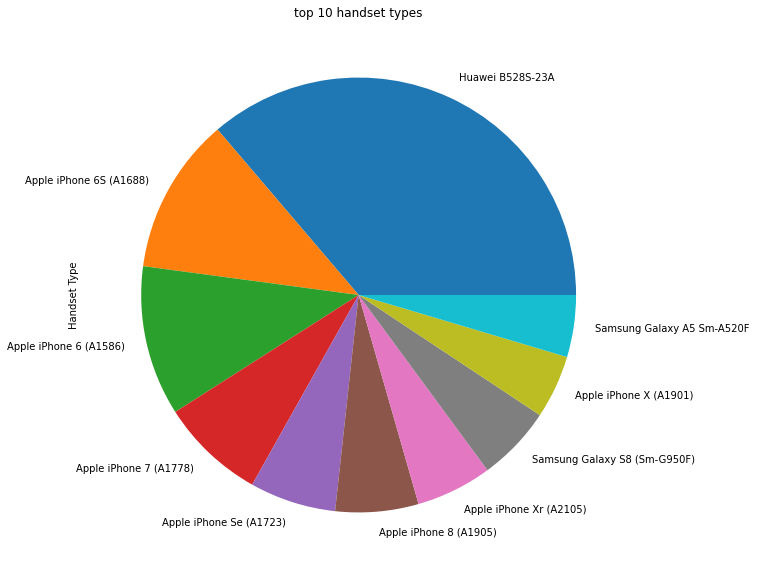

In [28]:
# Generate data on subjectivity
fig = plt.figure(figsize = (10,10))
top10handsets.plot.pie(grid=True)
plt.title('top 10 handset types')
#plt.xlabel('subjectivity')
#plt.ylabel('count')
#plt.grid(axis='y', alpha=0.75)

Identifying the top 3 handset manufacturers

In [31]:
# get the top 3 handset manufacturers
top3manufacturers = df['Handset Manufacturer'].value_counts().nlargest(n=3)
top3manufacturers

Apple      69123
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

Text(0.5, 1.0, 'top 3 handset manufacturers')

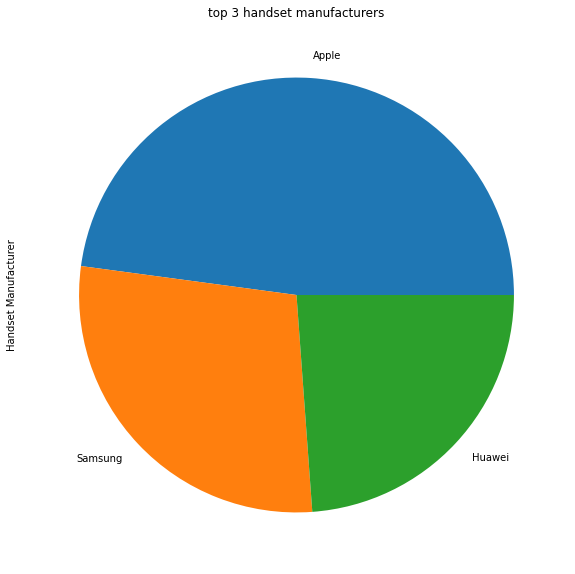

In [30]:
# Generate plot on top 3 handset manufacturers
fig = plt.figure(figsize = (10,10))
top3manufacturers.plot.pie(grid=True)
plt.title('top 3 handset manufacturers')
#plt.xlabel('subjectivity')
#plt.ylabel('count')
#plt.grid(axis='y', alpha=0.75)

Identify the top 5 handsets per top 3 handset manufacture

In [34]:
apple_manufacturer = df.loc[df['Handset Manufacturer'] == 'Apple', ['Handset Type']].value_counts().nlargest(5)
samsung_manufacturer = df.loc[df['Handset Manufacturer'] == 'Samsung', ['Handset Type']].value_counts().nlargest(5)
huawei_manufacturer = df.loc[df['Handset Manufacturer'] == 'Huawei', ['Handset Type']].value_counts().nlargest(5)

print("Top 5 apple headset types\n", apple_manufacturer)
print("\nTop 5 samsung headset types\n", samsung_manufacturer)
print("\nTop 5 huawei headset types\n", huawei_manufacturer)

Top 5 apple headset types
 Handset Type           
Huawei B528S-23A           9558
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
dtype: int64

Top 5 samsung headset types
 Handset Type                
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
dtype: int64

Top 5 huawei headset types
 Handset Type                  
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
dtype: int64


Short interpretation and recommendation to marketing teams

Interpretations

* As we can clearly see from the data, from the top 10 headsets used by customers, 7 of them are Apples products. And even though top of this list is Huawei specific headset product 'Huawei B528S-23A', when we see the combined number of headset products used by customers, Apple is leading. And Samsung is following with Huawei being the third.

* And even though number nine on the list is a samsung product. Considering the total number of headsets made, samsung is the second headset producers.


Recommendations

* [For Apple] Its better to incorporate the specific huawei products' ability to the Apple headset products in order to increase Apple headsets products power and usage by our customers.

* We need to consider marketing our telecom to Huawei and Samsung product customers, because most of our customers are already Apple product users.

### Aggregate per user the following information in the column

Defining the user

In [40]:
print(df['IMSI'].value_counts())          # International Mobile Subscriber Identity: 8
print(df['MSISDN/Number'].value_counts()) # MS International PSTN/ISDN Number of mobile - customer number - 106,856
print(df['Bearer Id'].value_counts())     # xDr session identifier - 10

2.082020e+14    84602
2.082010e+14    52348
2.082000e+14     9572
2.082100e+14     3474
2.140740e+14        1
2.082520e+14        1
2.040810e+14        1
2.040470e+14        1
Name: IMSI, dtype: int64
3.366371e+10    1066
3.362632e+10      18
3.361489e+10      17
3.362578e+10      17
3.365973e+10      16
                ... 
3.360118e+10       1
3.368998e+10       1
3.376372e+10       1
3.360748e+10       1
3.361962e+10       1
Name: MSISDN/Number, Length: 106856, dtype: int64
7.349880e+18    39915
1.304240e+19    37251
1.311450e+19    35114
7.277830e+18    29667
6.917540e+18     5886
1.268210e+19     1003
1.013887e+19      990
7.421940e+18       97
1.318650e+19       76
7.566060e+18        1
Name: Bearer Id, dtype: int64


Number of xDR sessions

In [41]:
# xDr sessions per user or MSISDN/Number
xDR_session_per_user = df.groupby('MSISDN/Number')['Bearer Id'].sum()
xDR_session_per_user # data type Series

MSISDN/Number
3.360100e+10    1.311450e+19
3.360100e+10    7.349880e+18
3.360100e+10    7.349880e+18
3.360101e+10    1.304240e+19
3.360101e+10    1.462771e+19
                    ...     
3.379000e+10    1.304240e+19
3.379000e+10    1.311450e+19
3.197020e+12    7.277830e+18
3.370000e+14    7.349880e+18
8.823970e+14    7.277830e+18
Name: Bearer Id, Length: 106856, dtype: float64

Session duration

Total download (DL) and upload (UL) data

Total data volume (in Bytes) during this session for each application

In [1]:
# df['IMEI'].hist()

In [2]:
# sns.displot(data = df, x =df['IMEI'])